# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
from os import stat
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  for i in range(len(X1)):
    if X1[i] + X2[i] > T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)

  return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []
    for i in range(len(X1)):
      if X1[i] + X2[i] > T:
        state_neuron.append(1)
      else:
        state_neuron.append(0)

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 0 # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 0: [0, 1, 1, 1]


There’s no fixed universal value for θ — you can set it depending on the logic or behavior you want the neuron to model.

Answer the Following Question:

• Question - 1: List out all the limitations of MCP - Neurons.

• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.


{Can you devise a if else rules.}

• Question - 1: List out all the limitations of MCP - Neurons.


Here are the main limitations of McCulloch-Pitts (MCP) neurons:

a. No Learning Ability

MCP neurons have fixed weights and thresholds, so they cannot learn or adapt based on data.

b. Only Binary Inputs/Outputs

It only works with 0 and 1 values. It cannot handle real-valued inputs.

c. Fixed Threshold

The neuron fires or not based on a hard threshold — no flexibility or smooth activation.

d. Linear Decision Boundaries Only

MCP can only solve linearly separable problems like AND, OR.
→ Cannot solve problems like XOR, which are non-linearly separable.

e. No Concept of Time

It cannot deal with temporal patterns (everything is assumed to happen instantly).

f. No Bias Term

There’s no bias input to shift the threshold easily, which limits flexibility.



• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.


 No, a single MCP neuron cannot solve XOR.

Why? Because XOR is not linearly separable, and MCP neurons can only handle linear decision boundaries.



# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI and ML/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Viewing the Dataset.

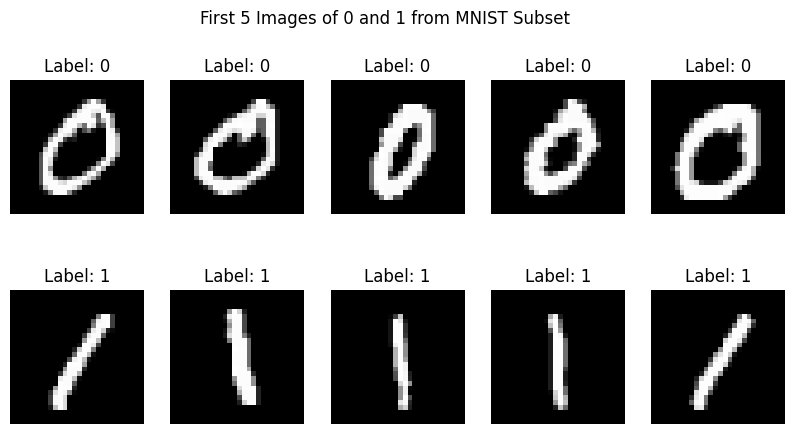

In [2]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [3]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [4]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)        # if prediction is greater than or equal to 0 then it assigns 1 else, it assigns 0.
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [7]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
        predictions = np.dot(X, weights) + bias
        y_pred_all = np.where(predictions >= 0, 1, 0)
        weights += learning_rate * np.dot(X.T, (y - y_pred_all))
        bias += learning_rate * np.sum(y - y_pred_all)
        accuracy = np.mean(y_pred_all == y)
        print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")
    return weights, bias, accuracy

## Training the Perceptron

In [8]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/200, Accuracy: 0.9974
Epoch 2/200, Accuracy: 0.9973
Epoch 3/200, Accuracy: 0.9974
Epoch 4/200, Accuracy: 0.9973
Epoch 5/200, Accuracy: 0.9974
Epoch 6/200, Accuracy: 0.9974
Epoch 7/200, Accuracy: 0.9976
Epoch 8/200, Accuracy: 0.9976
Epoch 9/200, Accuracy: 0.9976
Epoch 10/200, Accuracy: 0.9976
Epoch 11/200, Accuracy: 0.9976
Epoch 12/200, Accuracy: 0.9976
Epoch 13/200, Accuracy: 0.9976
Epoch 14/200, Accuracy: 0.9976
Epoch 15/200, Accuracy: 0.9976
Epoch 16/200, Accuracy: 0.9976
Epoch 17/200, Accuracy: 0.9976
Epoch 18/200, Accuracy: 0.9976
Epoch 19/200, Accuracy: 0.9976
Epoch 20/200, Accuracy: 0.9977
Epoch 21/200, Accuracy: 0.9979
Epoch 22/200, Accuracy: 0.9979
Epoch 23/200, Accuracy: 0.9979
Epoch 24/200, Accuracy: 0.9979
Epoch 25/200, Accuracy: 0.9979
Epoch 26/200, Accuracy: 0.9979
Epoch 27/200, Accuracy: 0.9979
Epoch 28/200, Accuracy: 0.9979
Epoch 29/200, Accuracy: 0.9980
Epoch 30/200, Accuracy: 0.9979
Epoch 31/200, Accuracy: 0.9979
Epoch 32/200, Accuracy: 0.9979
Epoch 33/200, Acc

## Step 5: Visualize Misclassified Images

Final Accuracy: 0.9987


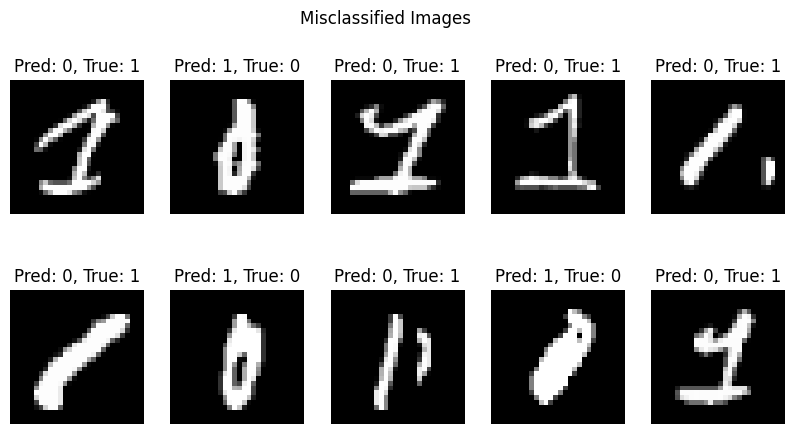

In [9]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

here 10 samples are incorrect prediction, so the accuaracy becomes 0.9974